In [43]:
pwd


'/Users/temismollz/ipynb files'

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('year2000(1).csv')
df.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
1031268,1048570,2000,12,14,1,830,2,PA (1),70.0,1,10.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1
1031269,1048571,2000,12,15,2,830,2,PA (1),66.0,1,6.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1
1031270,1048572,2000,12,16,3,830,2,PA (1),54.0,1,29.0,35.0,DCA,LGA,214.0,YES,YES,1,1,2,Dec,1
1031271,1048573,2000,12,17,4,830,2,PA (1),70.0,1,10.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1
1031272,1048574,2000,12,18,5,830,2,PA (1),65.0,1,5.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1


#### Popular Destinations with Average Arrival Delays 

In [46]:
Test5 = df[['Dest', 'ArrDelay']]
Test5 = Test5.groupby(['Dest']).mean().reset_index()
Test5.head(10)

,Dest,ArrDelay
0,ABE,6.026242
1,ABQ,7.013407
2,ACV,22.334337
3,AGS,7.889680
4,ALB,9.372688
5,ALO,6.828909
6,AMA,5.423406
7,ANC,11.760627
8,APF,6.359281
9,ATL,5.070929


In [47]:
# To get the number of destinations
Test5.shape

(236, 2)

In [48]:
Test_5= df.Dest.value_counts().rename_axis('Dest').reset_index(name='FLIGHTS').iloc[0:30]
Test_5.head(15)

,Dest,FLIGHTS
0,ORD,56527
1,ATL,47061
2,LAX,37813
3,DFW,35478
4,DEN,34816
5,STL,30949
6,SFO,30442
7,PHX,27873
8,DTW,25734
9,MSP,22032


In [49]:
Test5_5 = pd.merge(Test_5, Test5, on='Dest')
Test5_5.head()

,Dest,FLIGHTS,ArrDelay
0,ORD,56527,5.186495
1,ATL,47061,5.070929
2,LAX,37813,13.942321
3,DFW,35478,4.323637
4,DEN,34816,9.374138


In [50]:
Test5_5.describe()

,FLIGHTS,ArrDelay
count,30.000000,30.000000
mean,21744.033333,8.822905
std,11420.922828,3.142679
min,10716.000000,4.323637
25%,12777.250000,6.934489
50%,17991.500000,8.523794
75%,27338.250000,10.133758
max,56527.000000,19.817423


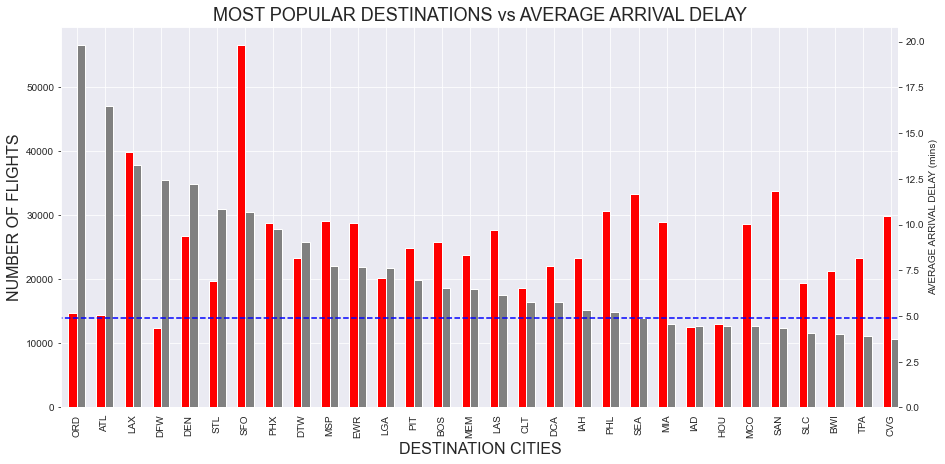

In [51]:
Test5_5 = Test5_5.set_index('Dest')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # To create matplotlib axes
ax2 = ax.twinx() # Create the axes that shares the same x-axis
width = .3

Test5_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
Test5_5.ArrDelay.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

So horizontal dotted line across the graph shows the average delay threshold on arrival for the top 30 destinations is 5mins. ORD & ATL have one of the hughest number of landing and an average delay of 5mins. San Francisco on the other has a highest minute average delay of nearly 20mins so is Philadelphia, San-Diego and Seattle-Tacoma International Airport

#### Popular Destinations with Average Departure Delays 

In [52]:
Test6 = df[['Origin', 'DepDelay']]
Test6 = Test6.groupby(['Origin']).mean().reset_index()
Test6.head(10)

,Origin,DepDelay
0,ABE,3.465138
1,ABQ,7.165977
2,ACV,19.368732
3,AGS,4.779152
4,ALB,6.690985
5,ALO,3.486726
6,AMA,5.083496
7,ANC,9.276163
8,APF,0.923077
9,ATL,5.367690


In [53]:
Test_6= df.Origin.value_counts().rename_axis('Origin').reset_index(name='FLIGHTS').iloc[0:30]
Test_6.head(15)

,Origin,FLIGHTS
0,ORD,55935
1,ATL,46803
2,LAX,37788
3,DFW,35013
4,DEN,34298
5,SFO,30658
6,STL,30310
7,PHX,27509
8,DTW,24801
9,EWR,22022


In [54]:
Test6_6 = pd.merge(Test_6, Test6, on='Origin')
Test6_6.head()

,Origin,FLIGHTS,DepDelay
0,ORD,55935,7.060463
1,ATL,46803,5.367690
2,LAX,37788,11.787869
3,DFW,35013,6.046983
4,DEN,34298,10.112864


In [55]:
Test6_6.shape

(30, 3)

In [56]:
Test6_6.describe()

,FLIGHTS,DepDelay
count,30.000000,30.000000
mean,21591.266667,7.595278
std,11278.733840,2.129389
min,10802.000000,4.478863
25%,12720.750000,6.056498
50%,17659.500000,7.453150
75%,26832.000000,8.589662
max,55935.000000,14.435743


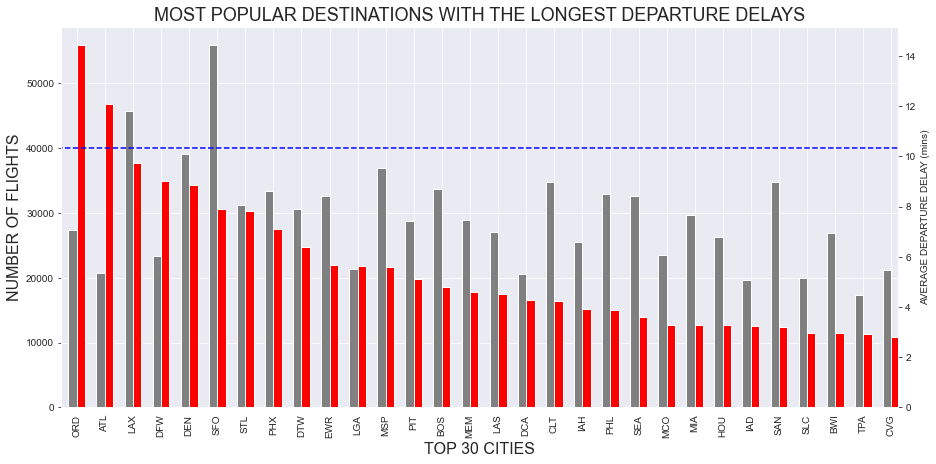

In [57]:
Test6_6 = Test6_6.set_index('Origin')

fig = plt.figure(figsize=(15,7)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Test6_6.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
Test6_6.DepDelay.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

### Number of Destinations By Airline 

In [58]:
Cities = df[['UniqueCarrier', 'Dest', 'ArrDelay']]
Cities = Cities.groupby(['UniqueCarrier', 'Dest']).mean().reset_index()

In [59]:
Cities.UniqueCarrier.value_counts()

UA        130
DL        118
AA        112
CO        111
NW        109
PI         89
TW         85
EA         82
US         77
HP         41
PA (1)     31
AS         30
PS         29
WN         28
Name: UniqueCarrier, dtype: int64

In [60]:
Temp = Cities[(Cities['UniqueCarrier'] == "UA")]


In [61]:
Temp.head()

,UniqueCarrier,Dest,ArrDelay
837,UA,ABE,4.636042
838,UA,ABQ,6.968254
839,UA,ACV,22.334337
840,UA,ALB,6.505938
841,UA,ANC,12.958696


In [62]:
Temp.Dest.nunique()

130

This shows the number of cities an airlines travels to within the US. United Airlines travels to 130 cities within the US.

In [63]:
# Convert the output to a df
CitiesAirline = Cities.UniqueCarrier.value_counts().rename_axis('Uniquecarrier').reset_index(name='NumberOfCities')
CitiesAirline.head(10)

,Uniquecarrier,NumberOfCities
0,UA,130
1,DL,118
2,AA,112
3,CO,111
4,NW,109
5,PI,89
6,TW,85
7,EA,82
8,US,77
9,HP,41


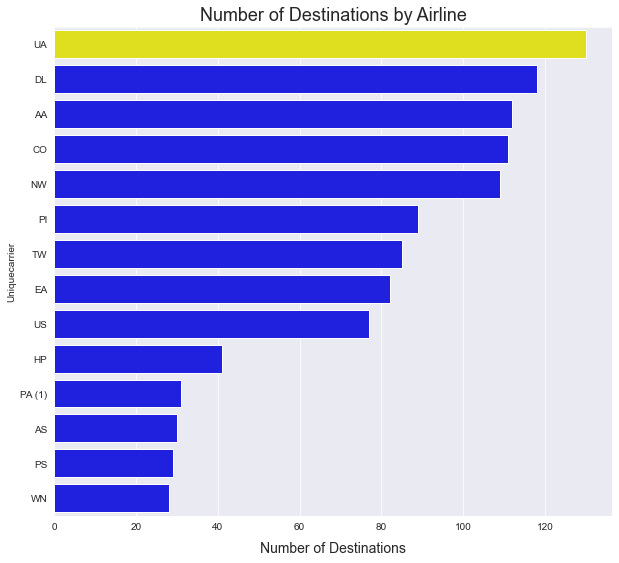

In [64]:
# Visualise Tweets by Location
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(10,9))
ax = sns.barplot(x="NumberOfCities", y="Uniquecarrier", data=CitiesAirline, palette=["blue" if y!='UA' else "yellow" for y in CitiesAirline.Uniquecarrier])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [65]:
df['ARR-DEP_DELAY'] = df['ArrDelay'] - df['DepDelay']
df.head(5).append(df.tail(5))

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus,ARR-DEP_DELAY
0,0,2000,10,14,3,730,2,PS,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1,12.0
1,1,2000,10,15,4,730,2,PS,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1,15.0
2,2,2000,10,17,6,730,2,PS,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1,18.0
3,3,2000,10,18,7,730,2,PS,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct,0,-1.0
4,4,2000,10,19,1,730,2,PS,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1,14.0
1031268,1048570,2000,12,14,1,830,2,PA (1),70.0,1,10.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1,10.0
1031269,1048571,2000,12,15,2,830,2,PA (1),66.0,1,6.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1,6.0
1031270,1048572,2000,12,16,3,830,2,PA (1),54.0,1,29.0,35.0,DCA,LGA,214.0,YES,YES,1,1,2,Dec,1,-6.0
1031271,1048573,2000,12,17,4,830,2,PA (1),70.0,1,10.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1,10.0
1031272,1048574,2000,12,18,5,830,2,PA (1),65.0,1,5.0,0.0,DCA,LGA,214.0,YES,NO,1,0,2,Dec,1,5.0


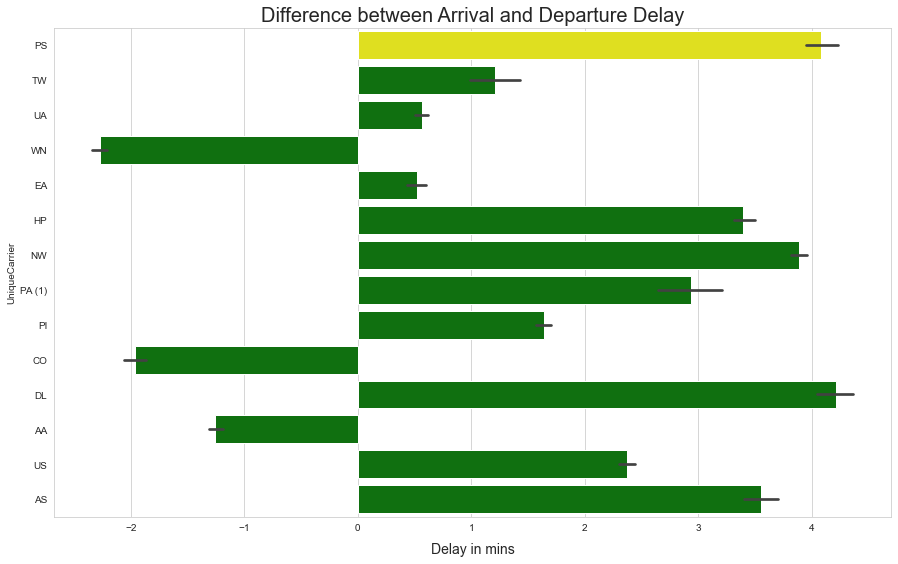

In [66]:
sns.set_style('whitegrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="UniqueCarrier", data=df, palette=["green" if y!='UA' else "yellow" for y in CitiesAirline.Uniquecarrier])
plt.title('Difference between Arrival and Departure Delay', fontsize=20)
plt.xlabel('Delay in mins', fontsize=14, labelpad=10);
plt.show()


### Combination of all EDA 

In [77]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

In [78]:
df.columns


Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'IsArrDelayed',
       'IsDepDelayed', 'ArrDelClass', 'DepDelClass', 'CRSDepTimeE', 'MONTH',
       'FlightStatus', 'ARR-DEP_DELAY'],
      dtype='object')

In [79]:
df.DayOfWeek.value_counts()

4    156152
1    152101
5    149518
7    145329
3    144581
2    143903
6    139689
Name: DayOfWeek, dtype: int64

In [80]:
df_top20 = df.Origin.value_counts()[:20]

trace = go.Bar(x=df_top20.index, y=df_top20.values, marker=dict(color=df_top20.values, colorscale='Earth', showscale=True))

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=45), title='TOP 20 DESTINATIONS', yaxis=dict(title='Number of Flights'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)


fig.append_trace(go.Bar(x=df.ArrDelay, y=df.DayOfWeek, marker=dict(color='rgba(50, 171, 96, 0.6)',
        line=dict(color='rgba(50, 171, 96, 1.0)', width=1),
),
    name='TEST', orientation='h',), 1, 1)


fig.append_trace(go.Scatter(x=df.DEP_DELAY, y=df.DayOfWeek, mode='lines+markers', line_color='rgb(128, 0, 128)',
    name='Household net worth, Million USD/capita',), 1, 2)